In [1]:
from seattle_bike_data.bike_counts import BikeData

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import calendar

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [34]:
spokane = BikeData('spokane street bridge')

In [4]:
spokane.hourly_totals.sample(5)

date  total  west  east  weekday  month  \
year dayofyear hour                                                          
2017 290       12   2017-10-17 12:00:00      7     5     2        1     10   
     59        15   2017-02-28 15:00:00     19    12     7        1      2   
2016 285       15   2016-10-11 15:00:00     50    42     8        1     10   
     104       19   2016-04-13 19:00:00     52    43     9        2      4   
2014 161       8    2014-06-10 08:00:00    143    14   129        1      6   

                     day   day_name  dayofyear_float  
year dayofyear hour                                   
2017 290       12     17    Tuesday       290.500000  
     59        15     28    Tuesday        59.625000  
2016 285       15     11    Tuesday       285.625000  
     104       19     13  Wednesday       104.791667  
2014 161       8      10    Tuesday       161.333333

In [5]:
spokane.daily_totals.sample(5)

,,,total,west,east,weekday,day_name,day,date,month,dayofyear_float
year,dayofyear,hour,,,,,,,,,
2016,238,0,1295,661,634,3,Thursday,25,2016-08-25,8,238.0
2015,131,0,1084,546,538,0,Monday,11,2015-05-11,5,131.0
2016,123,0,2525,1263,1262,0,Monday,2,2016-05-02,5,123.0
2019,72,0,902,448,454,2,Wednesday,13,2019-03-13,3,72.0
2015,302,0,810,404,406,3,Thursday,29,2015-10-29,10,302.0


<IPython.core.display.Javascript object>


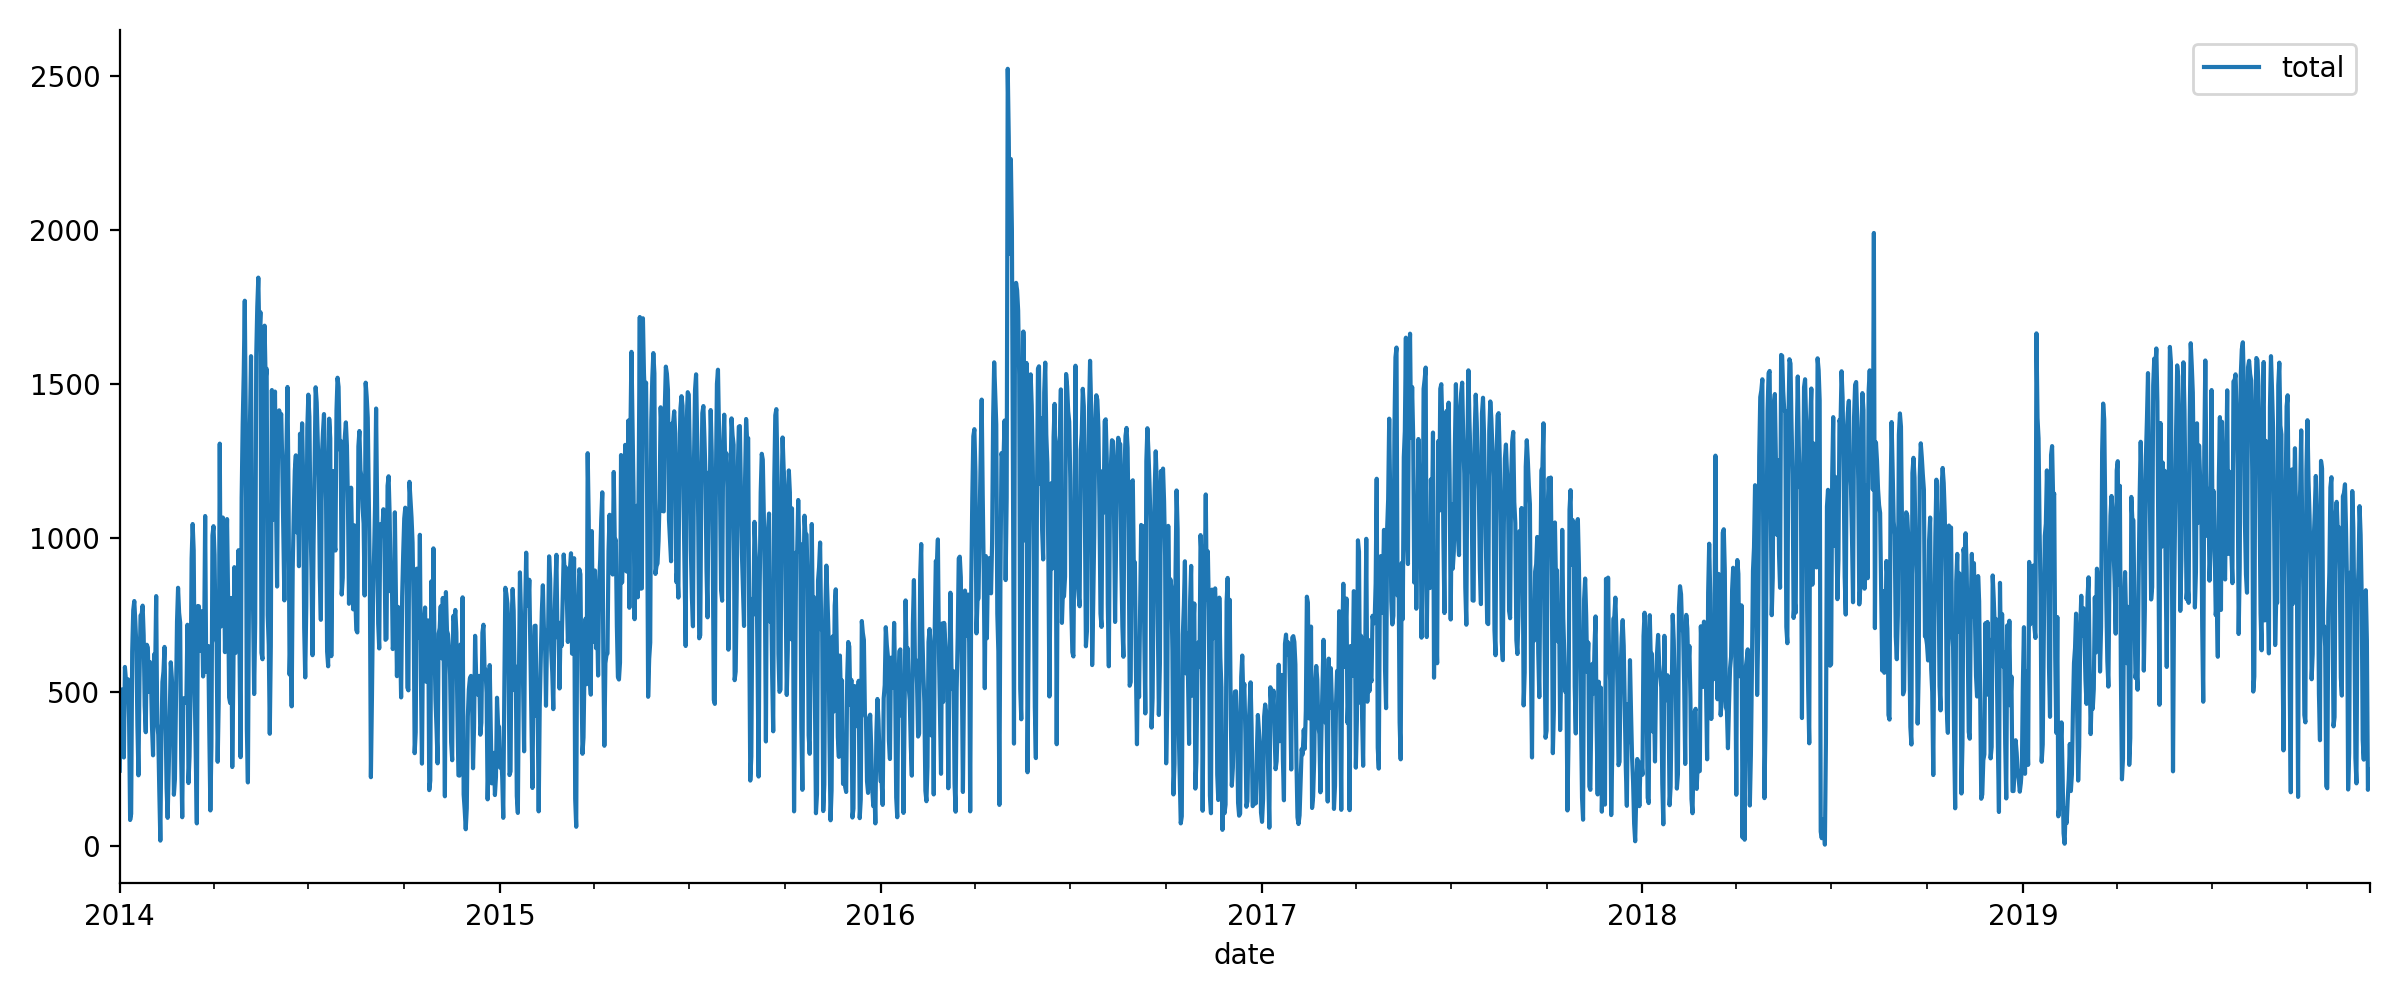

In [6]:
fig,ax = plt.subplots(figsize=(12,5))
spokane.daily_totals.plot(ax=ax, x='date', y='total')
# ax.legend(['hourly totals'])
sns.despine()
fig.tight_layout()

<IPython.core.display.Javascript object>


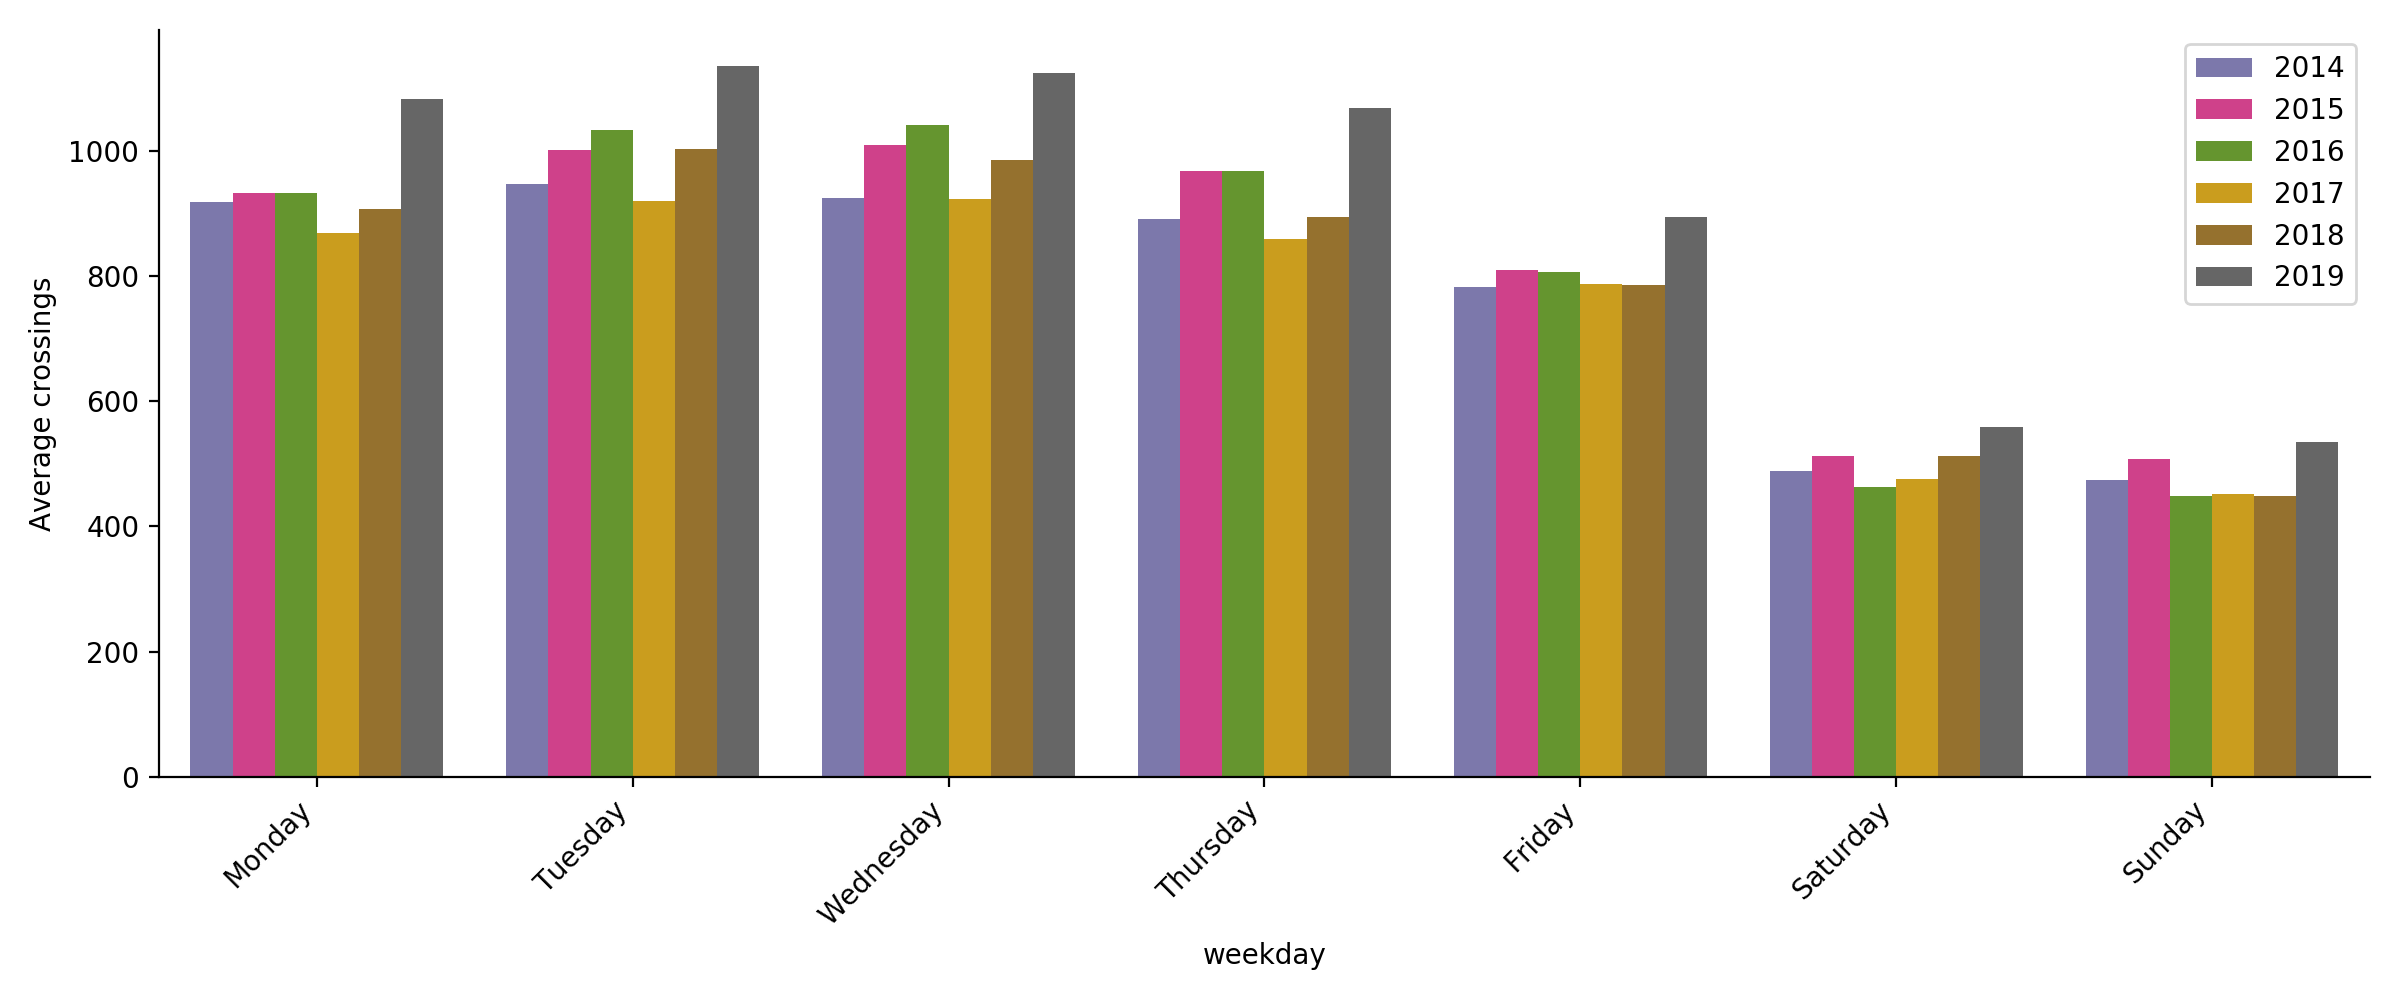

In [7]:
spokane.make_weekday_plot()

<IPython.core.display.Javascript object>


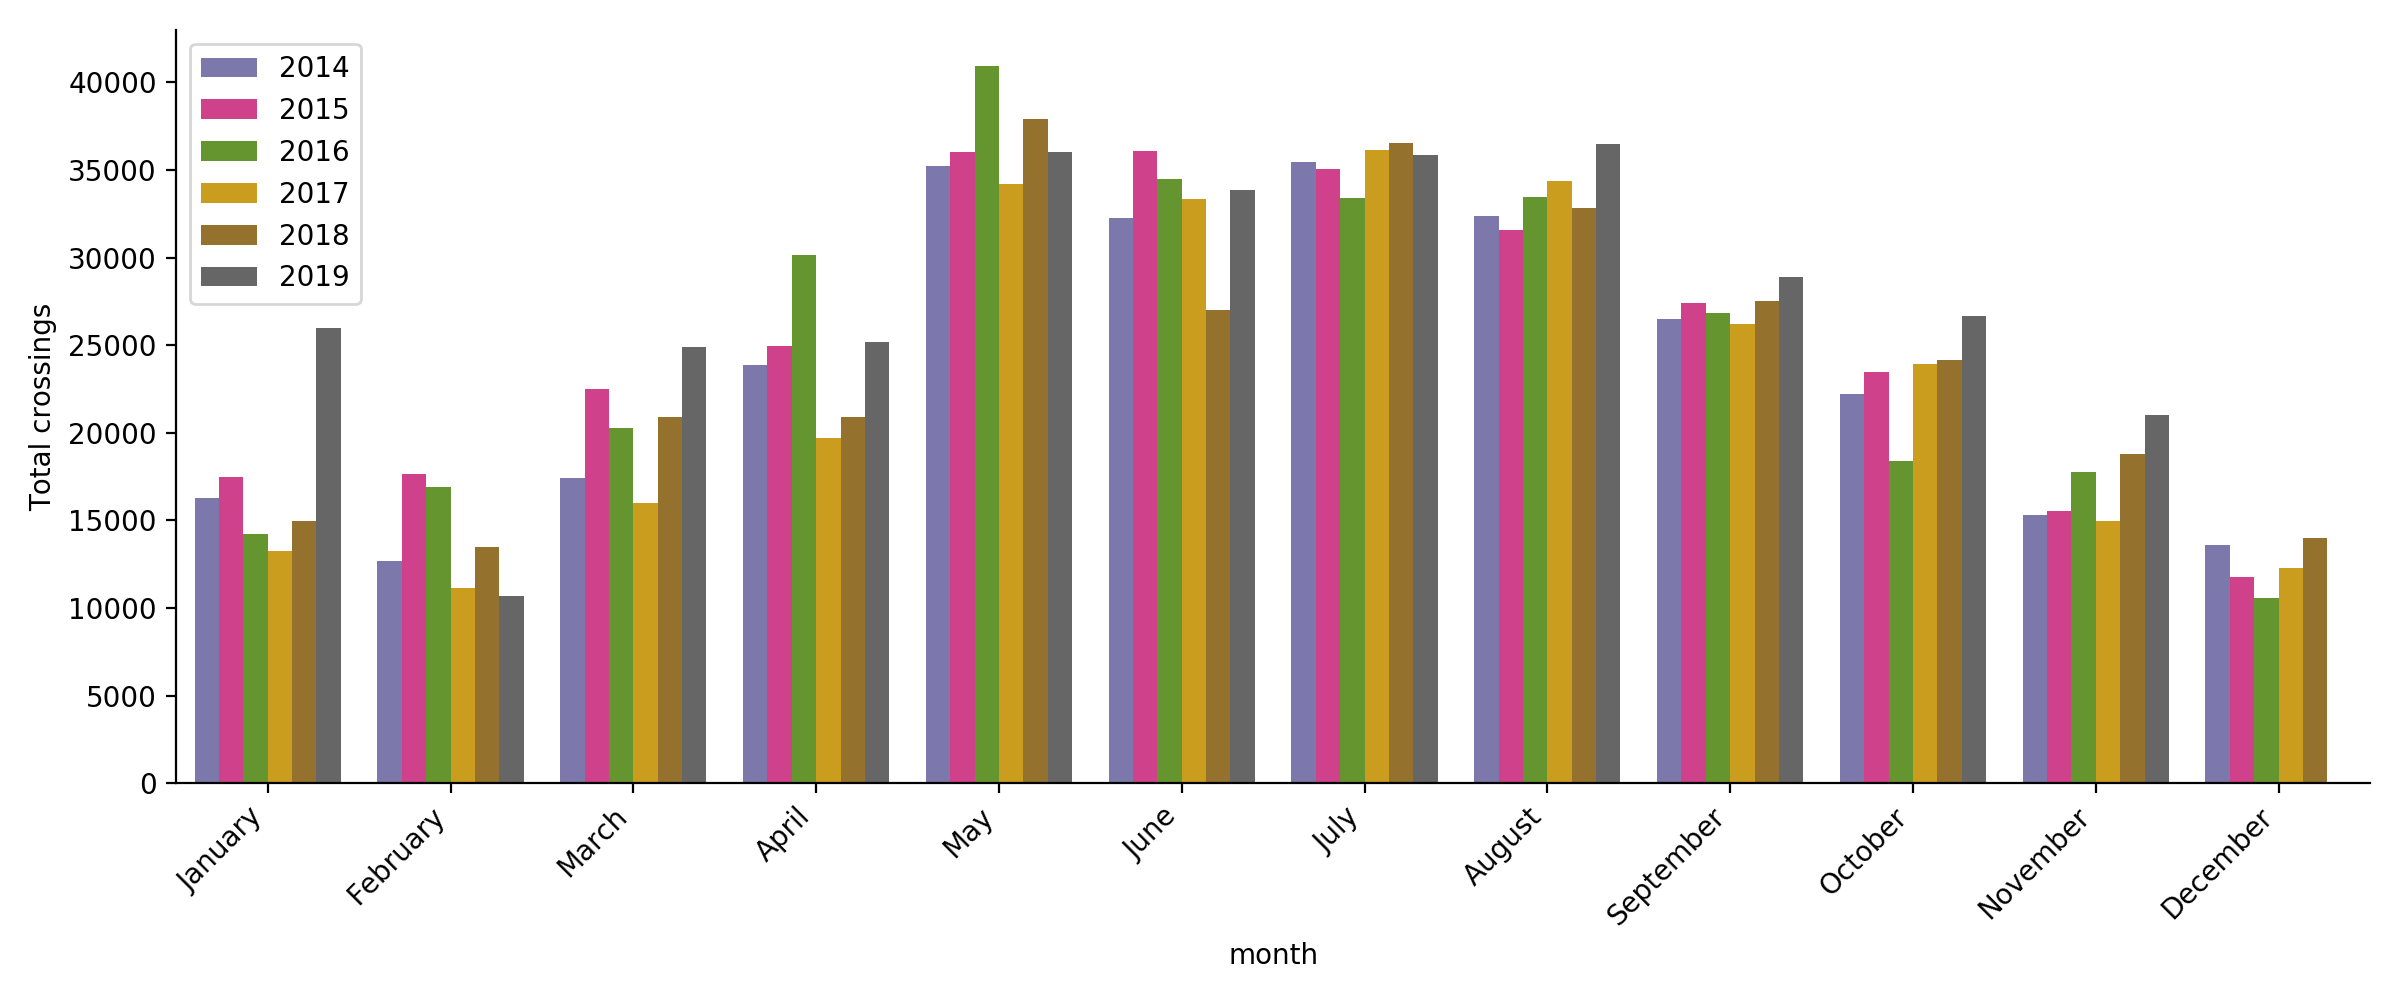

In [36]:
spokane.make_monthly_plot()

In [64]:
import plotly.graph_objects as go

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
for year in sorted(spokane.grouped_by_month.reset_index().year.unique()):
    fig.add_trace(go.Bar(
        x=months,
        y=spokane.grouped_by_month.reset_index().query('year==@year')['total_crossings'].values,
        name=str(year),
        marker_color='#%02x%02x%02x' % tuple([int(255*c) for c in spokane.yearly_palette_dict[year]])
    ))

fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [65]:
spokane.grouped_by_month

total_crossings month_name
month year                            
1     2014            16249    January
      2015            17494    January
      2016            14221    January
      2017            13262    January
      2018            14946    January
...                     ...        ...
12    2014            13612   December
      2015            11750   December
      2016            10572   December
      2017            12264   December
      2018            14019   December

[71 rows x 2 columns]

In [62]:
'#%02x%02x%02x' % tuple([int(255*c) for c in spokane.yearly_palette_dict[year]])

'#666666'

In [55]:
import numpy as np
(np.array(spokane.yearly_palette_dict[year])*255).astype(int)

array([102, 102, 102])

In [61]:
'#%02x%02x%02x' % tuple([0, 128, 64])

'#008040'